# MNIST :)

In [1]:
from keras.utils import to_categorical
import math
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

E:\ANACONDA\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Working On the Data
### 1. Load the data 

In [2]:
from keras.datasets import mnist 
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

### 2. Reshape and normalize

In [3]:
x_train = np.array(x_train).reshape(len(x_train), 28, 28, 1).astype('float32') / 255
x_validation = np.array(x_validation).reshape(len(x_validation), 28, 28, 1).astype('float32') / 255

### 3. One-hot Encoding

In [4]:
y_train = to_categorical(y_train, 10)  
y_validation = to_categorical(y_validation, 10)  

### 4. Display the Shape

In [5]:
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_validation.shape: ', x_validation.shape)
print('y_validation.shape: ', y_validation.shape)

x_train.shape:  (60000, 28, 28, 1)
y_train.shape:  (60000, 10)
x_validation.shape:  (10000, 28, 28, 1)
y_validation.shape:  (10000, 10)


## The Image

Text(0.5,1,'label: 5')

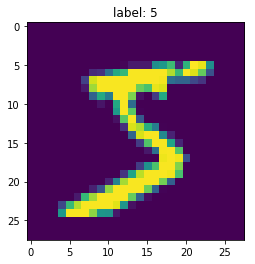

In [6]:
plt.imshow(x_train[0][:,:,0])
plt.title('label: {}'.format(np.argmax(y_train[0])))

## Setting the CNN Model

In [7]:
model = Sequential()
model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))
model.add(Conv2D(filters = 32,
                kernel_size=(3,3),
                padding='same',
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


## Complie The Model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit the Model
### 1. Data Augmentation

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

### 2. Decay Learning Rate
Reduce the learning rate by half if the accuracy is not improved after 3 epochs.

In [10]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### 3. Fit by batched train data

In [12]:
batch_size = 32
epochs = 5
train_history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                                    epochs=epochs, validation_data=(x_validation, y_validation),
                                    verbose=2, steps_per_epoch=x_train.shape[0] // batch_size
                                    , callbacks=[learning_rate_reduction])

Epoch 1/5
 - 163s - loss: 0.1297 - acc: 0.9603 - val_loss: 0.0259 - val_acc: 0.9914
Epoch 2/5
 - 156s - loss: 0.1094 - acc: 0.9664 - val_loss: 0.0234 - val_acc: 0.9921
Epoch 3/5
 - 156s - loss: 0.0997 - acc: 0.9698 - val_loss: 0.0210 - val_acc: 0.9926
Epoch 4/5
 - 160s - loss: 0.0945 - acc: 0.9710 - val_loss: 0.0309 - val_acc: 0.9902
Epoch 5/5
 - 169s - loss: 0.0818 - acc: 0.9749 - val_loss: 0.0204 - val_acc: 0.9926


## Train History

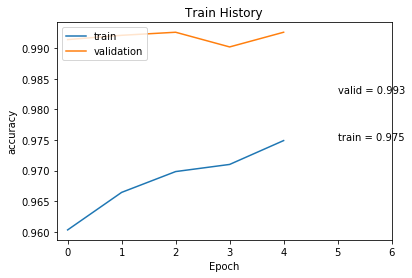

In [14]:
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
epoch_num = len(train_history.epoch)
final_epoch_train_acc = train_history.history['acc'][epoch_num - 1]
final_epoch_validation_acc = train_history.history['val_acc'][epoch_num - 1]
plt.text(epoch_num, final_epoch_train_acc, 'train = {:.3f}'.format(final_epoch_train_acc))
plt.text(epoch_num, final_epoch_validation_acc-0.01, 'valid = {:.3f}'.format(final_epoch_validation_acc))
plt.title('Train History')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.xlim(xmax=epoch_num+1)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()